In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('books.csv')
df1=pd.read_csv('book_tags.csv')
df2=pd.read_csv('ratings.csv')

In [7]:
#How many books do not have an original title [books.csv]?

notogt=df['original_title'].isna().sum()
notogt

36

In [26]:
#How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

df3=df.dropna(subset=['original_title'])
df4=pd.merge(df3,df1,on='goodreads_book_id')
df4=pd.merge(df4,df3,on='book_id')

unibooks=df4['original_title_x'].nunique()
unibooks

363

In [19]:
#How many unique users are present in the dataset [ratings.csv]

uni=df2['user_id'].nunique()
uni

40836

In [21]:
#How many unique tags are there in the dataset [book_tags.csv] ?

unitag=df1['tag_id'].nunique()
unitag

3651

In [43]:
#Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value)’.

freq=df1[df1['count']==df1['count'].max()].sort_values('tag_id').iloc[0]
freq['tag_id']

30574

In [46]:
#Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] .

df5=pd.merge(df,df1,on='goodreads_book_id')
title=df5.loc[df5['count'].idxmax()]
title['title']

'Bossypants'

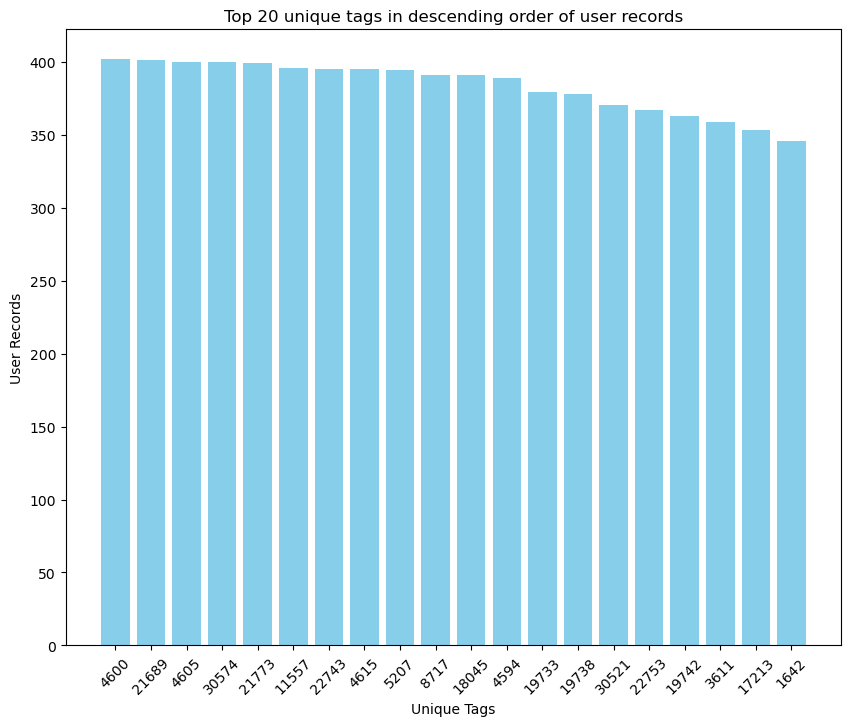

,tag_id,user_records
608,4600,402
2428,21689,401
612,4605,400
3339,30574,400
2450,21773,399
1367,11557,396
2565,22743,395
620,4615,395
709,5207,394
1103,8717,391


In [59]:
#Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]

user=df1.groupby('tag_id')['goodreads_book_id'].count().reset_index(name='user_records')

top=user.sort_values('user_records',ascending=False).head(20)

plt.figure(figsize=(10,8))
plt.bar(top['tag_id'].astype(str),top['user_records'],color='skyblue')
plt.title('Top 20 unique tags in descending order of user records')
plt.xlabel('Unique Tags')
plt.ylabel('User Records')
plt.xticks(rotation=45)
plt.show()